<a href="https://colab.research.google.com/github/eunikehp/RevoU/blob/main/Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1lzEdjn0XT4AIPUak9q7nKZecBHRP286m033Jw8LzlVk/edit#gid=1516914041'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
sheet_url_trf
df = pd.read_csv(sheet_url_trf)

In [3]:
df_cleaned = df.copy()

In [4]:
# fixing datatype to datetime
df_cleaned['Date']= pd.to_datetime(df_cleaned['Date'])
# create new columns
df_cleaned['Revenue']=df_cleaned['Unit price'] * df_cleaned['Quantity']

In [5]:
#check typo
df_cleaned['City'].value_counts()
# use looping
for col_name in ['Payment', 'Branch', 'Gender', 'City']:
    print(df_cleaned[col_name].value_counts(), '\n')

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64 

A    340
B    332
C    328
Name: Branch, dtype: int64 

Female    501
Male      499
Name: Gender, dtype: int64 

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64 



In [6]:
df_cleaned.head()

,Date,Invoice ID,Payment,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Revenue
0,2019-01-05,750-67-8428,Ewallet,A,Yangon,Member,Female,Health and beauty,74.69,7,522.83
1,2019-03-08,226-31-3081,Cash,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,76.40
2,2019-03-03,631-41-3108,Credit card,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,324.31
3,2019-01-27,123-19-1176,Ewallet,A,Yangon,Member,Male,Health and beauty,58.22,8,465.76
4,2019-02-08,373-73-7910,Ewallet,A,Yangon,Normal,Male,Sports and travel,86.31,7,604.17


In [7]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1000 non-null   datetime64[ns]
 1   Invoice ID     1000 non-null   object        
 2   Payment        1000 non-null   object        
 3   Branch         1000 non-null   object        
 4   City           1000 non-null   object        
 5   Customer type  1000 non-null   object        
 6   Gender         1000 non-null   object        
 7   Product line   1000 non-null   object        
 8   Unit price     1000 non-null   float64       
 9   Quantity       1000 non-null   int64         
 10  Revenue        1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 86.1+ KB


In [8]:
#check duplicate (cek di column yg unique kyk ID)
df_cleaned['Invoice ID'].duplicated().sum()

0

# EDA

## daily trend overall

In [9]:
agg_daily = df_cleaned.groupby('Date', as_index=False).sum()
agg_daily.head()

,Date,Unit price,Quantity,Revenue
0,2019-01-01,659.95,81,4519.22
1,2019-01-02,357.08,48,1852.86
2,2019-01-03,475.66,37,1979.17
3,2019-01-04,310.46,32,1546.37
4,2019-01-05,739.64,55,3368.27


In [10]:
agg_daily = df_cleaned.groupby('Date', as_index=False)['Revenue','Quantity'].sum()
agg_daily.head()

<ipython-input-10-8a0bddcc7511>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_daily = df_cleaned.groupby('Date', as_index=False)['Revenue','Quantity'].sum()


,Date,Revenue,Quantity
0,2019-01-01,4519.22,81
1,2019-01-02,1852.86,48
2,2019-01-03,1979.17,37
3,2019-01-04,1546.37,32
4,2019-01-05,3368.27,55


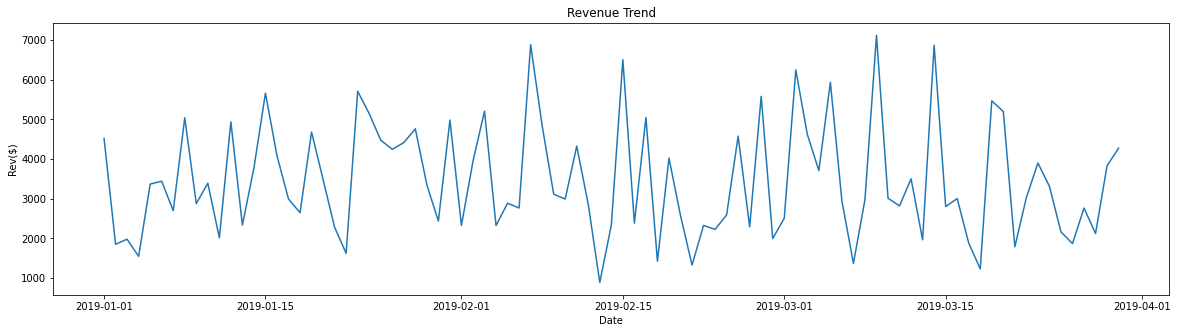

In [11]:
plt.rcParams["figure.figsize"] = (20,5)

plt.plot('Date','Revenue',data=agg_daily)
plt.title('Revenue Trend')
plt.xlabel('Date')
plt.ylabel('Rev($)')
plt.show()

<Axes: xlabel='Date', ylabel='Quantity'>

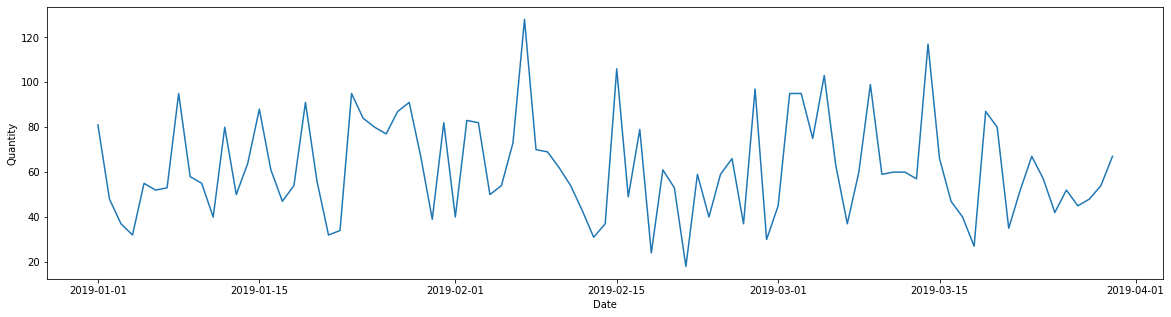

In [12]:
sns.lineplot(data = agg_daily, x='Date', y='Quantity')

# By Payment

In [13]:
agg_payment = df_cleaned.groupby('Payment', as_index = False).agg({'Revenue': 'sum', 'Invoice ID': 'nunique'})
agg_payment.head()

,Payment,Revenue,Invoice ID
0,Cash,106863.40,344
1,Credit card,95968.64,311
2,Ewallet,104755.34,345


<Axes: xlabel='Payment', ylabel='Revenue'>

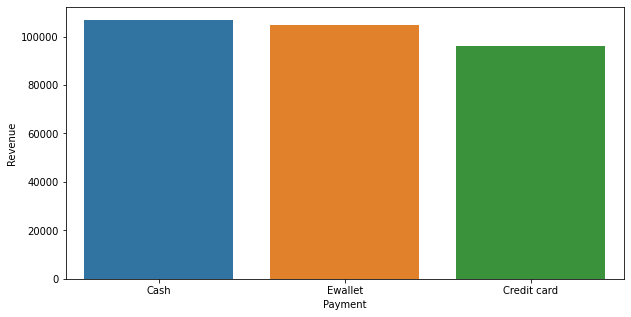

In [14]:
plt.rcParams["figure.figsize"] = (10,5)
sns.barplot(x='Payment',y='Revenue', data= agg_payment.sort_values('Revenue',ascending=False))

highest revenue comes from cash

<Axes: xlabel='Payment', ylabel='Invoice ID'>

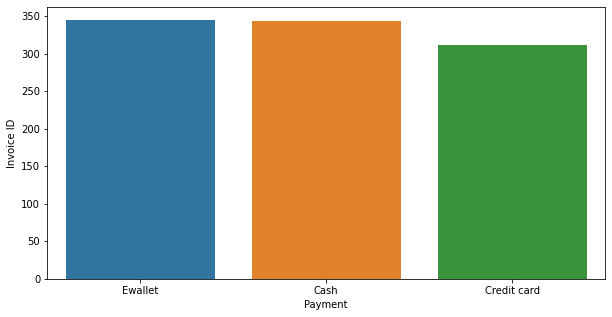

In [15]:
sns.barplot(x='Payment',y='Invoice ID', data= agg_payment.sort_values('Invoice ID',ascending=False))

ternyata kalo dilihat dari jumlah invoice nya, lebih banyak yg menggunakan Ewallet

([<matplotlib.patches.Wedge at 0x7fd0879e3eb0>,
 [Text(0.5073032188378986, 0.976034550698236, 'Cash'),
  Text(-1.0997450371451651, -0.023682340986048763, 'Credit card'),
  Text(0.5281991633287692, -0.9648863372743903, 'Ewallet')],
 [Text(0.27671084663885376, 0.5323824821990377, '34.7%'),
  Text(-0.5998609293519083, -0.012917640537844778, '31.2%'),
  Text(0.288108634542965, -0.5263016385133037, '34.1%')])

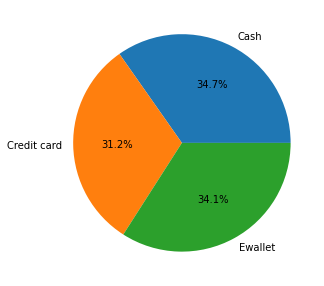

In [16]:
plt.pie(agg_payment['Revenue'], labels= agg_payment['Payment'], autopct='%.1f%%')

cash volume 34.7%
ewallet 34.1%
credit card 31.2%


# By gender and product type

In [17]:
agg_gender = df_cleaned.groupby(['Gender', 'Product line'], as_index = False)['Invoice ID'].nunique()
agg_gender.head()

,Gender,Product line,Invoice ID
0,Female,Electronic accessories,84
1,Female,Fashion accessories,96
2,Female,Food and beverages,90
3,Female,Health and beauty,64
4,Female,Home and lifestyle,79


<Axes: xlabel='Product line', ylabel='Invoice ID'>

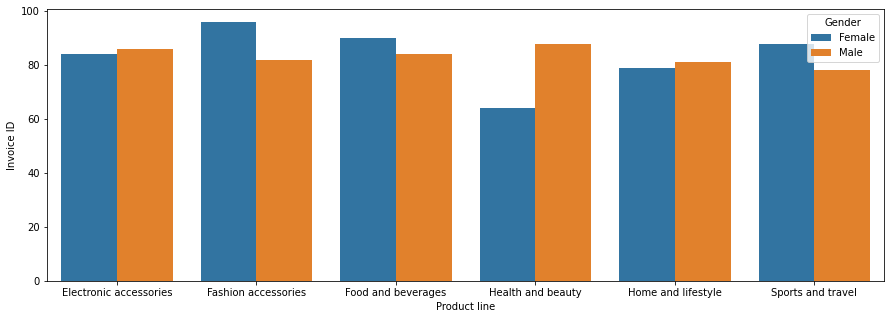

In [18]:
plt.rcParams["figure.figsize"] = (15,5)
sns.barplot(x='Product line',y='Invoice ID', data= agg_gender, hue = 'Gender')

fashion accessories didominasi oleh female 